In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 寻找轮廓
# 寻找轮廓是针对白色物体的，一定要保证物体是白色，而背景是黑色，不然很多人在寻找轮廓时会找到图片最外面的一个框
img = cv2.imread('handwriting.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# 寻找二值化图中的轮廓
# 参数2：轮廓的查找方式，一般使用cv2.RETR_TREE，表示提取所有的轮廓并建立轮廓间的层级
# 参数3：轮廓的近似方法。比如对于一条直线，我们可以存储该直线的所有像素点，也可以只存储起点和终点。
# 使用cv2.CHAIN_APPROX_SIMPLE就表示用尽可能少的像素点表示轮廓。
contours, hierarchy = cv2.findContours(
    thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))  # 结果应该为2

2


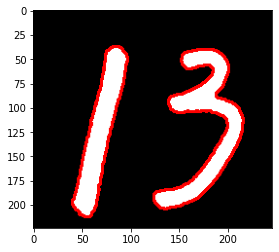

In [3]:
# 绘制轮廓
# 参数2就是得到的contours
# 参数3表示要绘制哪一条轮廓，-1表示绘制所有轮廓
# 参数4是颜色（B/G/R通道，所以(0,0,255)表示红色）
# 参数5是线宽
img_gray = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_gray, contours, -1, (0, 0, 255), 2)
plt.imshow(img_gray[:,:,::-1])
plt.show()